In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
df.info

<bound method DataFrame.info of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  

In [8]:
print("Checking for duplicate values: ", df.duplicated().sum() != 0)

Checking for duplicate values:  False


In [15]:
df['Process temperature [K]'] = df['Process temperature [K]'].astype(float)
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype(float)
df['Torque [Nm]'] = df['Torque [Nm]'].astype(float)
df['Tool wear [min]'] = df['Tool wear [min]'].astype(float)
df['Machine failure'] = df['Machine failure'].astype(float)

#counts the occurences and returns the first 3 rows of the dataframe
ds = df["Type"].value_counts().reset_index()[:3]
ds

,index,Type
0,L,6000
1,M,2997
2,H,1003


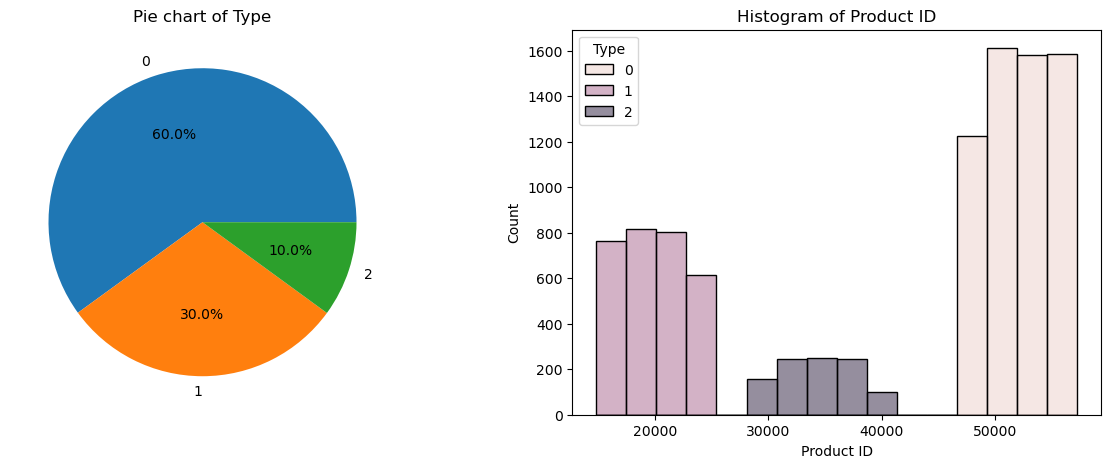

In [16]:
#removes the first letter and converts strings to numericals
df['Product ID'] = df['Product ID'].apply(lambda x: x[1:])
df['Product ID'] = pd.to_numeric(df['Product ID'])


# Convert the Type column M,L,H to 0,1,2
df['Type'] = df['Type'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)



# Show both plots in the same figure using subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Pie chart of Type')
sns.histplot(data=df, x='Product ID', hue='Type', ax=ax[1])
ax[1].set_title('Histogram of Product ID')
plt.show()

In [17]:
# Drop the UDI and Product ID column as it is not needed for the model training
df_ = df.copy()
df = df_.drop(['UDI', 'Product ID'], axis=1)

# Check for missing values
df.isnull().sum()

# Print count of Unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

Type 3
Air temperature [K] 93
Process temperature [K] 82
Rotational speed [rpm] 941
Torque [Nm] 577
Tool wear [min] 246
Machine failure 2
TWF 2
HDF 2
PWF 2
OSF 2
RNF 2


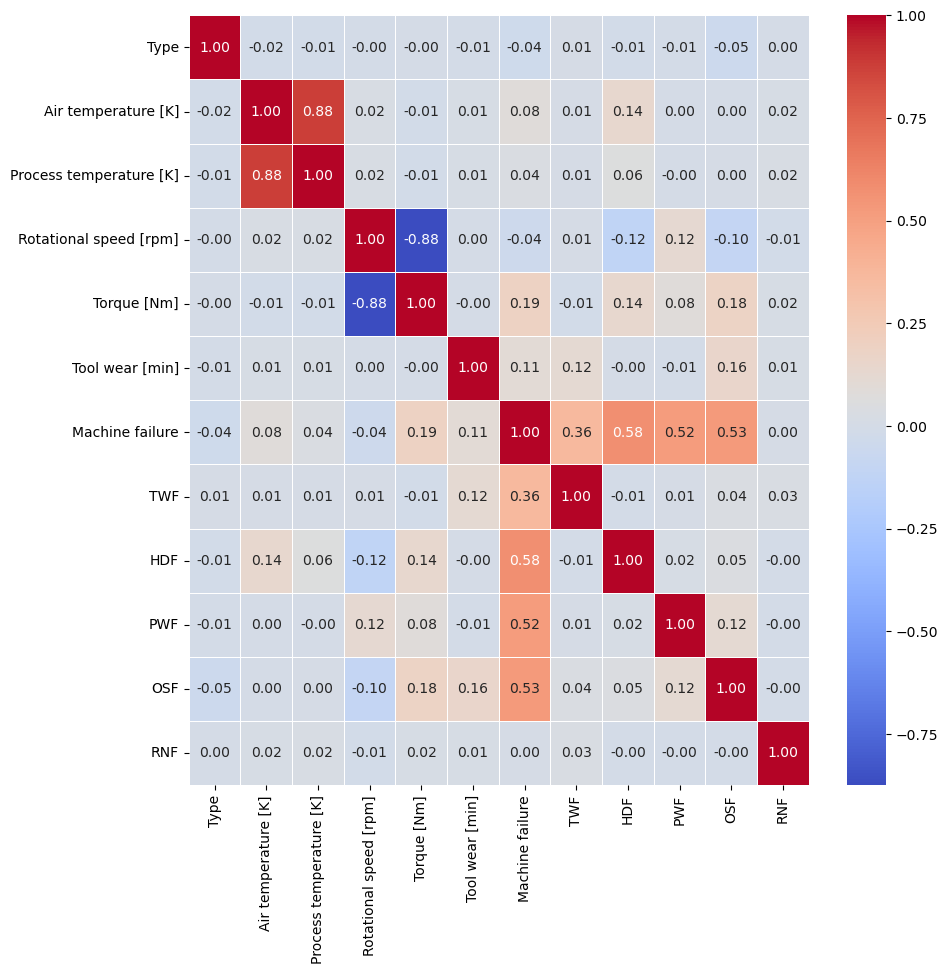

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()

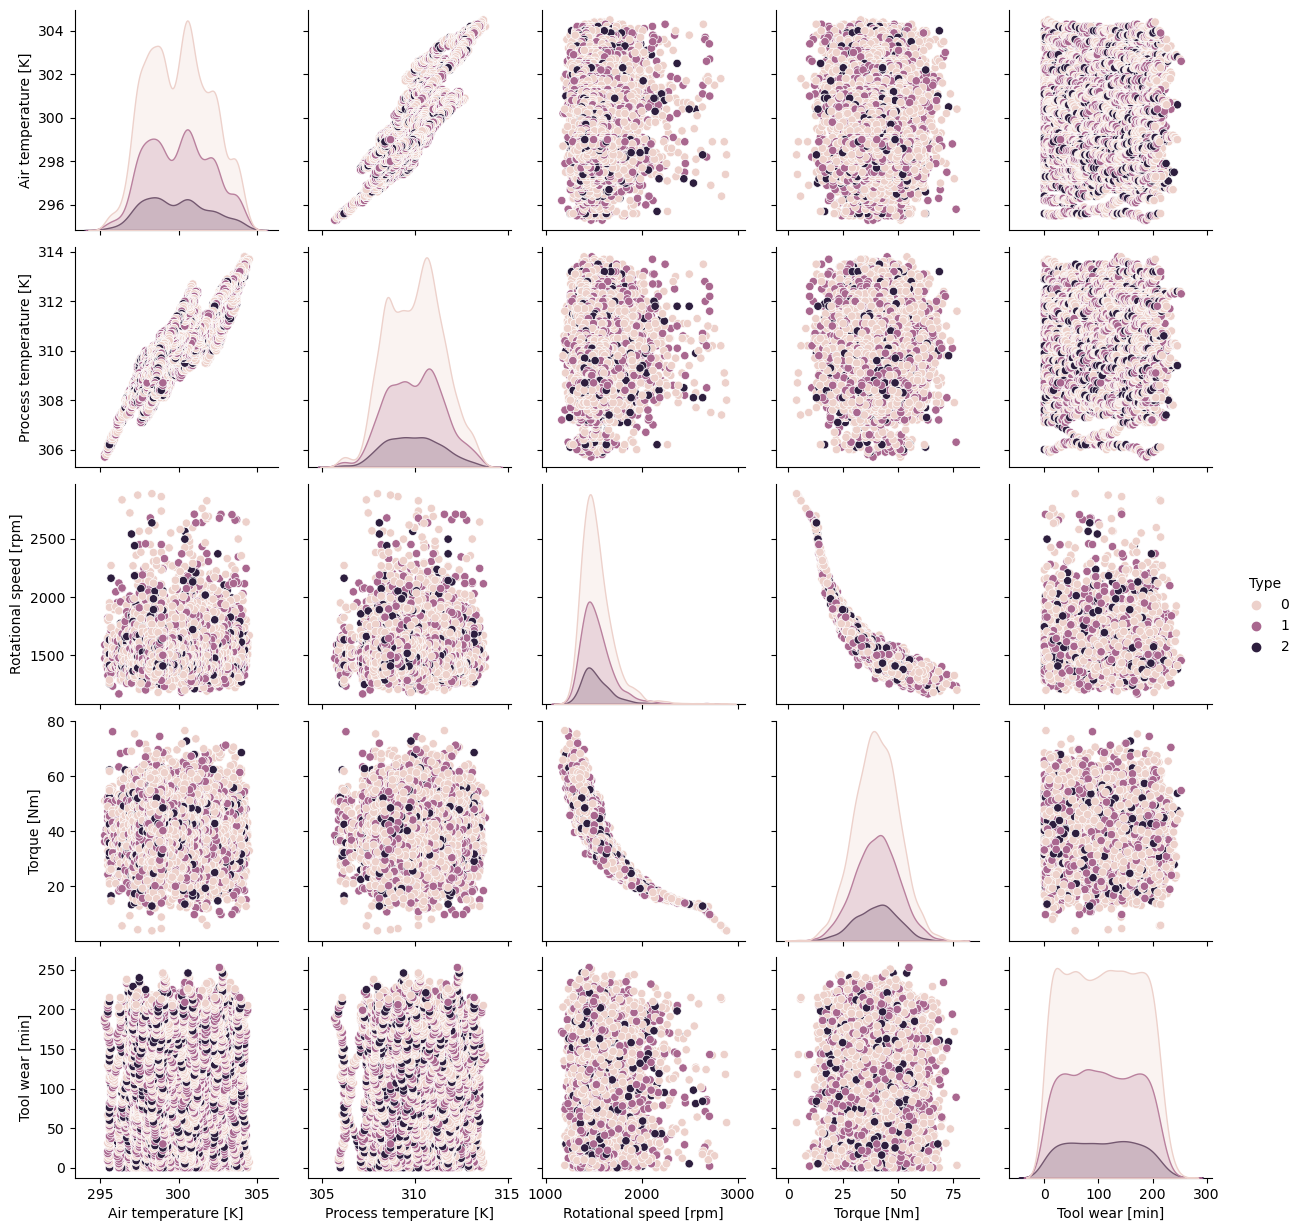

In [21]:
# Plot visualizations of the data and their correlations with the target variable
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type']
sns.pairplot(df.loc[:,numeric_cols],hue="Type",diag_kind='kde',kind='scatter')
plt.show()

In [22]:
# Standardize the data 
from sklearn.preprocessing import MinMaxScaler
X = df.drop('Type', axis=1)
y = df['Type']

print(X.shape, y.shape)



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 # Print the shapes of the training and testing sets and top 5 rows of the training set , X_train, y_train and X_test, y_test
print("----Training Data ----")
print(X_train.shape, y_train.shape)
print("----Test Data ----")
print(X_test.shape, y_test.shape)

for i in range(5):
    print("Training Set:", X_train[i], y_train.iloc[i])
    print("Testing Set:", X_test[i], y_test.iloc[i])

(10000, 11) (10000,)
----Training Data ----
(7000, 11) (7000,)
----Test Data ----
(3000, 11) (3000,)
Training Set: [-1.04701961 -0.60267611 -0.54145587  1.03051997 -1.30583543 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Testing Set: [ 1.1074301   1.0105289   0.04873445 -0.75987461 -0.41449086 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Training Set: [ 0.40598135  0.94331203  1.74135573 -1.78009946 -0.85234433 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 1
Testing Set: [-1.09712309 -1.87979674 -1.04812869  1.63065223  1.03980817 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Training Set: [ 0.85691269  0.40557702  0.03203095  0.21033921 -0.61777997 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615] 0
Testing Set: [ 0.65649876  0.27114327 -0.21295371 -0.01971149  1.24309728 -0.17971122
 -0.0656061  -0.10050378 -0.09605842 -0.09681295 -0.04476615

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#Traininglinear regression model and print the model's coefficients and intercept 
# lr : Linear Regression model  , y_pred : Predicted values of y_test  

lr = LinearRegression()
lr.fit(X_train, y_train)
print(pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff']))
print('Intercept - ', lr.intercept_)

y_pred = lr.predict(X_test)

# Evaluation metrics
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Store the results in a dictionary
results = {'Linear Regression': [lr_mse, lr_r2]}
results

                            Coeff
Air temperature [K]     -0.011040
Process temperature [K]  0.008331
Rotational speed [rpm]   0.001614
Torque [Nm]              0.008818
Tool wear [min]          0.007710
Machine failure         -0.040490
TWF                      0.020234
HDF                      0.007993
PWF                      0.013094
OSF                     -0.015281
RNF                      0.008644
Intercept -  0.5074285714285713


{'Linear Regression': [0.4419218179916888, 0.0010806306900319473]}

Training Accuracy    : 59.46 %
Model Accuracy Score : 61.27 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      1838
           1       0.00      0.00      0.00       873
           2       0.00      0.00      0.00       289

    accuracy                           0.61      3000
   macro avg       0.20      0.33      0.25      3000
weighted avg       0.38      0.61      0.47      3000

--------------------------------------------------------


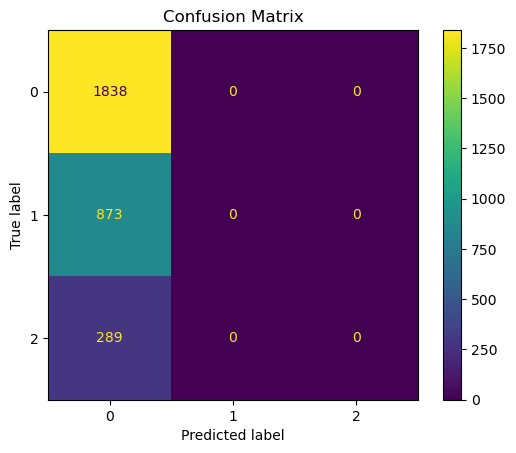

In [46]:
# Training a Logistic Regression model
# lg : Logistic Regression model  , y_pred_lg : Predicted values of y_test

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

# Evaluation metrics
log_train = round(lg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lg, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lg,zero_division=0))
print("\033[1m--------------------------------------------------------\033[0m")


cm = confusion_matrix(y_test, y_pred_lg, labels=lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 31.9 %
Model Accuracy Score : 30.43 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.68      0.04      0.08      1838
           1       0.29      0.96      0.45       873
           2       0.05      0.00      0.01       289

    accuracy                           0.30      3000
   macro avg       0.34      0.33      0.18      3000
weighted avg       0.50      0.30      0.18      3000

--------------------------------------------------------


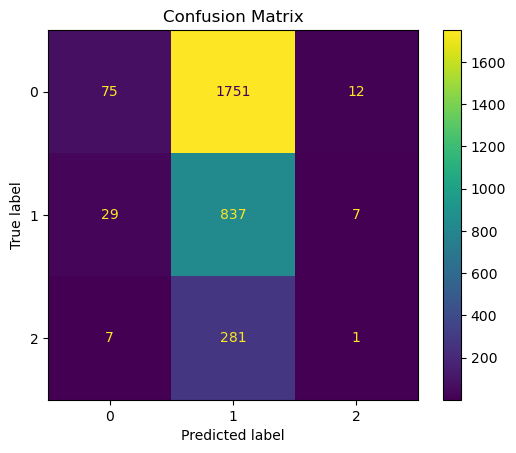

In [53]:
#Training a Naive Bayes model
#gnb : Naive Bayes Model  , y_pred_gnb : Predicted values of y_test "

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb  =  gnb.predict(X_test)


gnb_train = round(gnb.score(X_train, y_train) * 100, 2)

gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)

print("Training Accuracy    :",gnb_train ,"%")
print("Model Accuracy Score :",gnb_accuracy ,"%")

print("\033[1m--------------------------------------------------------\033[0m")

print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))

print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_gnb, labels=lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [50]:
results['Logistic Regression'] = [log_accuracy, log_train]
results['Naive Bayes'] = [gnb_accuracy, gnb_train]
results_df = pd.DataFrame(results, index=['Accuracy', 'Training Accuracy']).T
results_df

,Accuracy,Training Accuracy
Linear Regression,0.441922,0.001081
Logistic Regression,61.270000,59.460000
Naive Bayes,30.430000,31.900000
